# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bank = pd.read_csv('bank.csv')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [207]:
# 4,188 observations and 20 columns (19 feautures and response)
bank.shape

(41188, 20)

In [208]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [209]:
#Three columns have missing values 

print(bank.isnull().sum())

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [210]:
#Rename target column

bank.rename(index=str, columns={'y': 'term_deposit'}, inplace=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

In [211]:
#
bank.describe()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.009594,0.498654,0.362319,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [212]:
#Percentage of clients by job type
bank['job'].value_counts(normalize=True) * 100

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64

In [213]:
#Percentage of clients by marital status
bank['marital'].value_counts(normalize=True) * 100

marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64

In [214]:
#Percentage of clients by job type
bank['education'].value_counts(normalize=True) * 100

education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64

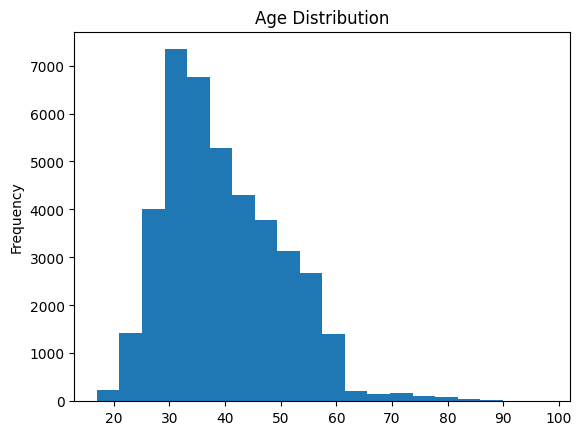

In [215]:
#Distribution of customer age.
bank['age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')

plt.savefig('age_distribution.png')

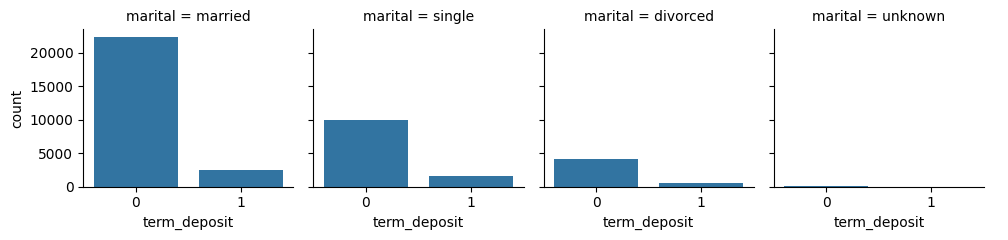

In [260]:
#Show target by marital status
sns.catplot(x = 'term_deposit', col='marital', kind='count',height=2.5, aspect=1, data=bank)
plt.savefig('marital_status.png')

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

In [219]:
#No significant outliers found.


#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

In [220]:
#Unique values by column

print(bank.nunique())

age                78
job                12
marital             4
education           8
default             2
housing             2
loan                2
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
term_deposit        2
dtype: int64


#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

term_deposit
0    88.734583
1    11.265417
Name: proportion, dtype: float64


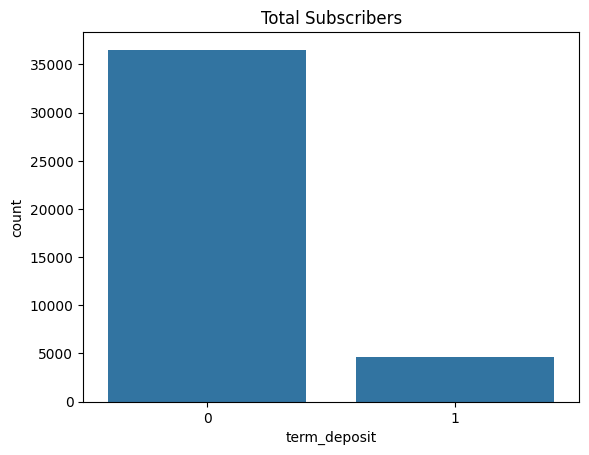

In [221]:
#Percentage of people who have a term_deposit. 11% of contacted customers got the product. This is an imbalanced dataset.

print(bank['term_deposit'].value_counts(normalize=True) * 100)

sns.countplot(x='term_deposit', data=bank)
plt.title('Total Subscribers')
plt.savefig('deposit_subscribers.png')

In [222]:
# Create age group bins
bank['age_group'] = pd.cut(
    bank['age'],
    bins=[0, 25, 35, 45, 55, 65, 100],  # Define bin edges
    labels=['<25', '26-35', '36-45', '46-55', '56-65', '65+']  # Labels for each bin
)

# Percentage of Term deposits by Age group
age_group = bank.groupby(by='age_group').term_deposit.mean() * 100
age_group_df = age_group.reset_index()
age_group_df

/var/folders/54/_867m59s07dcpb6y_rqmphr00000gn/T/ipykernel_21571/972880678.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = bank.groupby(by='age_group').term_deposit.mean() * 100


,age_group,term_deposit
0,<25,20.948379
1,26-35,11.719539
2,36-45,8.509810
3,46-55,8.691963
4,56-65,15.221060
5,65+,46.849758


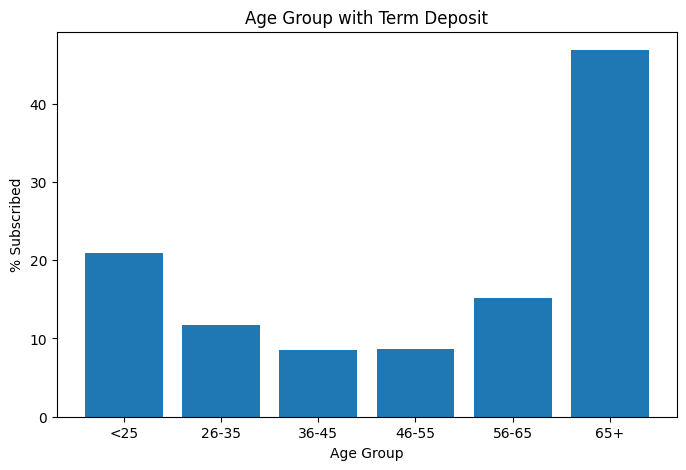

In [223]:
plt.figure(figsize=(8, 5))
plt.bar(age_group_df['age_group'], age_group_df['term_deposit'])


plt.title('Age Group with Term Deposit')
plt.xlabel('Age Group')
plt.ylabel('% Subscribed')
plt.savefig('subscriber_age_group.png')

Text(0, 0.5, 'Frequency')

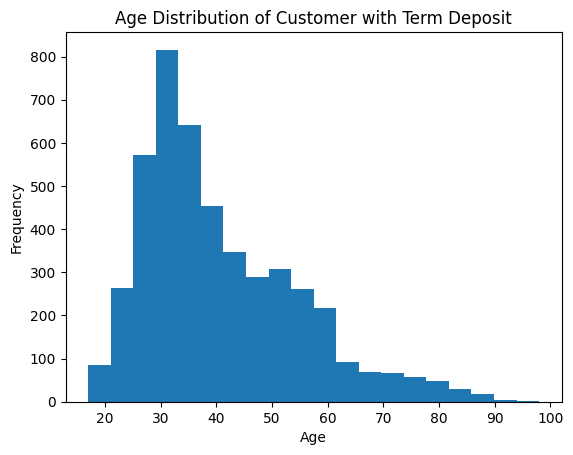

In [224]:
bank[bank['term_deposit'] == 1]['age'].plot(kind='hist', bins=20, title= 'Age Distribution of Customer with Term Deposit')

plt.xlabel('Age')
plt.ylabel('Frequency')


In [225]:
#Percentage of term deposits by people with loan defaults. 
bank.groupby(by='default').term_deposit.mean() * 100

default
0.0    12.878974
1.0     0.000000
Name: term_deposit, dtype: float64

In [226]:
# Filled null values in 'default' column with new category 'unknown' to be able to use this feature in the model. 
#This column had presented over 8,000 null values, however, it is a strong predictor as no customer with loan defaults subscribed to the term deposit.
bank['default'] = bank['default'].fillna('unknown')
bank.groupby(by='default').term_deposit.mean() * 100


default
0.0        12.878974
1.0         0.000000
unknown     5.152960
Name: term_deposit, dtype: float64

In [227]:
# Percentage of term deposits by people with active personal loans. No clear correlation
bank.groupby(by='loan').term_deposit.mean() * 100

loan
0.0    11.340206
1.0    10.931498
Name: term_deposit, dtype: float64

In [228]:
#Percentage of term deposits by people with an active mortgage. No clear correlation
bank.groupby(by='housing').term_deposit.mean() * 100

housing
0.0    10.879605
1.0    11.619392
Name: term_deposit, dtype: float64

In [229]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,age_group
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65
1,57,services,married,high.school,unknown,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65


#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

marital
unknown     15.000000
single      14.004149
divorced    10.320902
married     10.157253
Name: term_deposit, dtype: float64


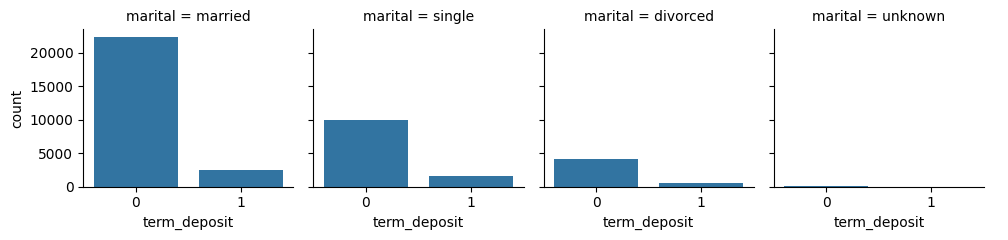

In [259]:
#Percentage of term deposits by marital status. Appears to be correlated.

print(bank.groupby(by='marital').term_deposit.mean().sort_values(ascending=False) * 100)

#Show target by marital status
sns.catplot(x = 'term_deposit', col='marital', kind='count',height=2.5, aspect=1, data=bank)
plt.savefig('marital_status.png')

education
illiterate             22.222222
unknown                14.500289
university.degree      13.724523
professional.course    11.348465
high.school            10.835523
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
Name: term_deposit, dtype: float64


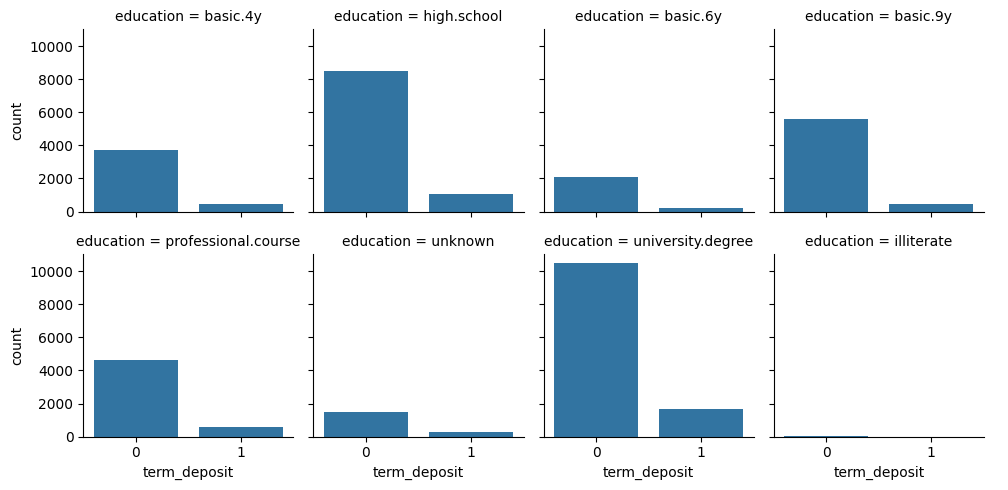

In [ ]:
#Percentage of term deposits by job education. 

print(bank.groupby(by='education').term_deposit.mean().sort_values(ascending=False) * 100)

sns.catplot(x = 'term_deposit', col='education', col_wrap=4, kind='count', height=2.5, aspect=1, data=bank)
plt.savefig('education.png')

job
student          31.428571
retired          25.232558
unemployed       14.201183
admin.           12.972558
management       11.217510
unknown          11.212121
technician       10.826042
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.138070
blue-collar       6.894316
Name: term_deposit, dtype: float64


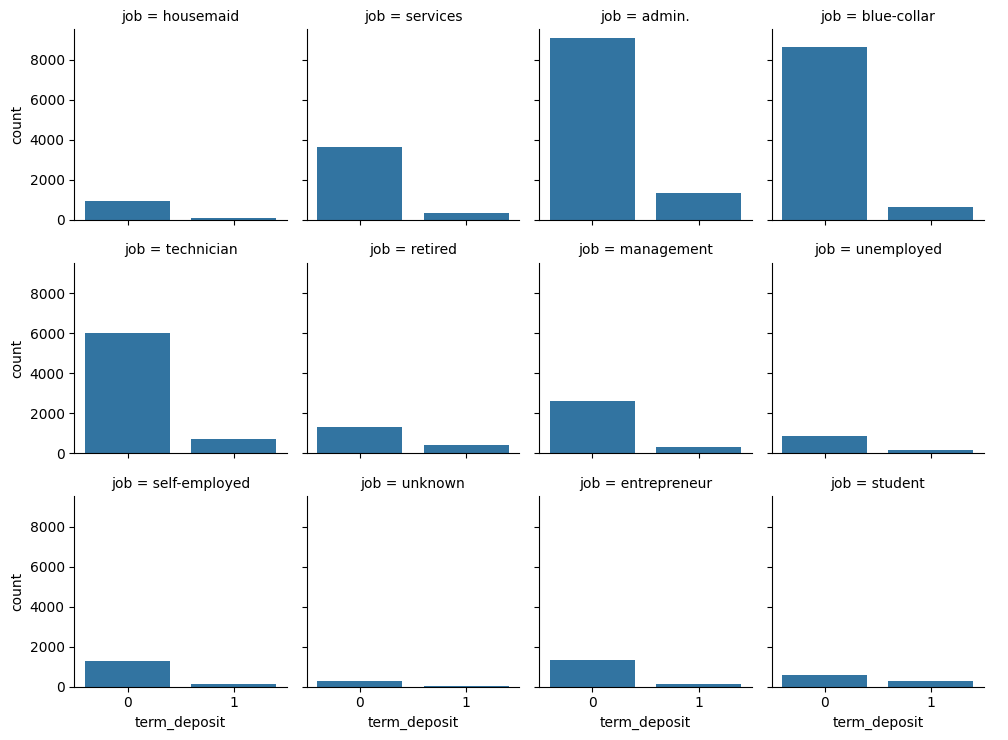

In [262]:
#Percentage of term deposits by job category. Appears to be correlated.

print(bank.groupby(by='job').term_deposit.mean().sort_values(ascending=False) * 100)

sns.catplot(x = 'term_deposit', col='job', col_wrap=4, kind='count',height=2.5, aspect=1, data=bank)
plt.savefig('jobs.png')

In [233]:
#Percentage of term deposits subcribers by month. 
month = bank.groupby(by='month').term_deposit.mean() * 100
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_clean = month.reindex(month_order)
month_clean

month
mar    50.549451
apr    20.478723
may     6.434745
jun    10.511470
jul     9.046557
aug    10.602137
sep    44.912281
oct    43.871866
nov    10.143867
dec    48.901099
Name: term_deposit, dtype: float64

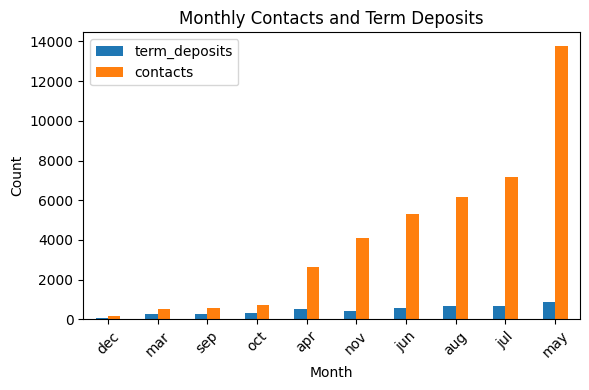

In [283]:
# month_term_count = bank.groupby('month')['term_deposit'].sum().sort_values()
# month_contacts = bank.groupby('month').value_counts()
month_summary = pd.DataFrame({'term_deposits': bank.groupby('month')['term_deposit'].sum(),
                              'contacts': bank.groupby('month').size()}).sort_values('contacts')

month_summary.plot(kind='bar', figsize=(6, 4))

plt.title('Monthly Contacts and Term Deposits')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('month_contact_term_deposit')


<Axes: xlabel='month'>

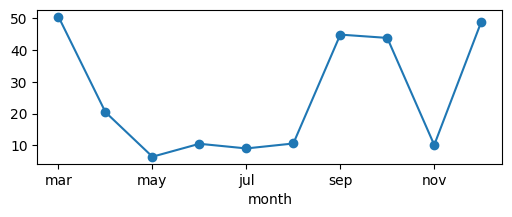

In [235]:
month_clean.plot(kind='line', figsize=(6,2), marker='o')

In [236]:
day = bank.groupby(by='day_of_week').term_deposit.mean() * 100
day
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
weekday = day.reindex(day_order)
weekday

day_of_week
mon     9.948320
tue    11.779975
wed    11.667076
thu    12.118752
fri    10.808739
Name: term_deposit, dtype: float64

In [237]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,age_group
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65
1,57,services,married,high.school,unknown,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65


#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

In [238]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'term_deposit', 'age_group'],
      dtype='object')


In [ ]:
#Selected all features related to the the customer itself. 

features = ['age', 
            'job', 
            'marital', 
            'education', 
            'default',
            'housing',
            'loan'
            ]


# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#Using simple imputer filled missing values using the most frequent values.
mode_imputer = SimpleImputer(strategy='most_frequent')
bank[['housing', 'loan']] = mode_imputer.fit_transform(bank[['housing', 'loan']])
bank.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
term_deposit      0
age_group         0
dtype: int64

In [241]:
print(bank.nunique())


age                78
job                12
marital             4
education           8
default             3
housing             2
loan                2
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
term_deposit        2
age_group           6
dtype: int64


#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [242]:
from sklearn.preprocessing import StandardScaler

X = bank[features]
y = bank['term_deposit']
X_dummies = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(X_dummies,y,random_state=99)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [243]:
X_dummies

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_1.0,default_unknown,housing_1.0,loan_1.0
0,56,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,37,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
41184,46,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
41185,56,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41186,44,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [275]:
# No strong correlation between the different features and the target.

corr_with_target = corr['term_deposit'].sort_values(ascending=False)
corr_with_target

term_deposit                     1.000000
job_student                      0.093955
job_retired                      0.092221
marital_single                   0.054133
education_university.degree      0.050364
age                              0.030399
education_unknown                0.021430
job_unemployed                   0.014752
housing_1.0                      0.011085
education_illiterate             0.007246
marital_unknown                  0.005211
education_professional.course    0.001003
job_unknown                     -0.000151
job_management                  -0.000419
default_1.0                     -0.003041
loan_1.0                        -0.004466
job_self-employed               -0.004663
job_technician                  -0.006149
job_housemaid                   -0.006505
education_high.school           -0.007452
job_entrepreneur                -0.016644
education_basic.6y              -0.023517
job_services                    -0.032301
marital_married                 -0

#### 3. Train a classifier on the training data

In [245]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled,y_train)
predictions = knn.predict(X_test_scaled)

#### 4. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

In [246]:
knn_accuracy = accuracy_score(y_test, predictions)
most_freq_class = y_train.value_counts().index[0]
baseline_predictions = [most_freq_class] * len(y_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print('Accuracy:', knn_accuracy)
print('Most Frequent Class:', baseline_accuracy)

Accuracy: 0.8876371758764688
Most Frequent Class: 0.8882198698650092


#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

In [247]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, predictions, labels=knn.classes_)

array([[9106,   40],
       [1117,   34]])

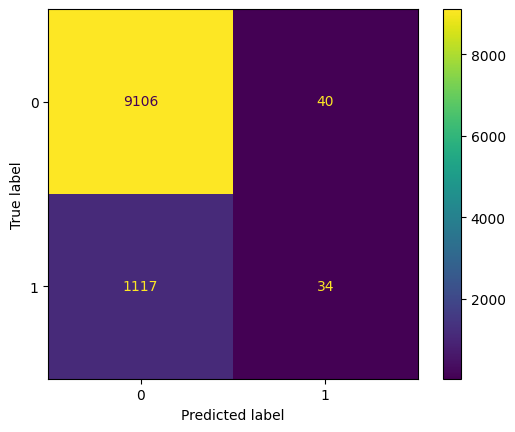

In [248]:

cm = confusion_matrix(y_test, predictions, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.savefig('confusion_matrix.png')

In [257]:
knn.predict_proba(X_train_scaled)

array([[0.85858586, 0.14141414],
       [0.93939394, 0.06060606],
       [0.87878788, 0.12121212],
       ...,
       [0.7979798 , 0.2020202 ],
       [0.8989899 , 0.1010101 ],
       [0.87878788, 0.12121212]], shape=(30891, 2))

In [269]:
#Check for the best value of K.
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    pred = knn.predict(X_test_scaled)
    score = float(sum(pred == y_test)) / len(y_test)
    scores.append([k, score])


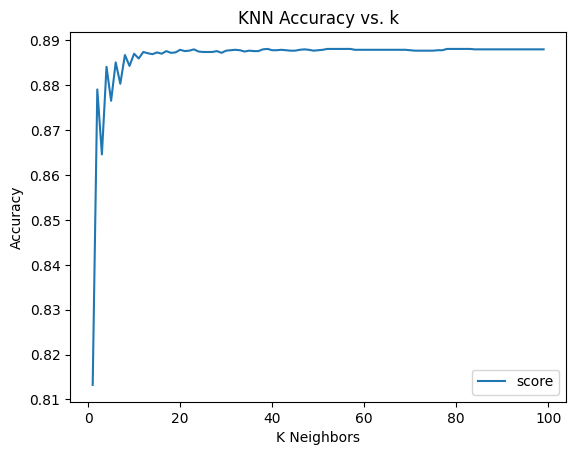

In [274]:
#Plotting the best value of K we can observe the accurracy peaks at about k=20.

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k')
plt.savefig('best_value_k.png')

#### 6. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [258]:
results = pd.DataFrame({'actual': y_test.reset_index(drop=True), 'predicted': predictions})
results['correct'] = results['actual'] == results['predicted']
results.head()

,actual,predicted,correct
0,0,0,True
1,1,0,False
2,0,0,True
3,0,0,True
4,0,0,True


#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

In [292]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,age_group
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65
1,57,services,married,high.school,unknown,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,36-45
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,56-65


In [312]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'term_deposit', 'age_group'],
      dtype='object')

In [318]:
#Selected all features related to the the customer itself. 

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']

In [319]:
#Using simple imputer filled missing values using the most frequent values.
mode_imputer = SimpleImputer(strategy='most_frequent')
bank[['housing', 'loan']] = mode_imputer.fit_transform(bank[['housing', 'loan']])
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
term_deposit      0
age_group         0
dtype: int64

In [320]:
from sklearn.preprocessing import StandardScaler

X = bank[features]
y = bank['term_deposit']
X_dummies = pd.get_dummies(X, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed'], drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(X_dummies,y,random_state=99)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [321]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled,y_train)
predictions = knn.predict(X_test_scaled)

In [322]:
knn_accuracy = accuracy_score(y_test, predictions)
most_freq_class = y_train.value_counts().index[0]
baseline_predictions = [most_freq_class] * len(y_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print('Accuracy:', knn_accuracy)
print('Most Frequent Class:', baseline_accuracy)

Accuracy: 0.8889967951830631
Most Frequent Class: 0.8882198698650092


In [323]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, predictions, labels=knn.classes_)

array([[8941,  205],
       [ 938,  213]])

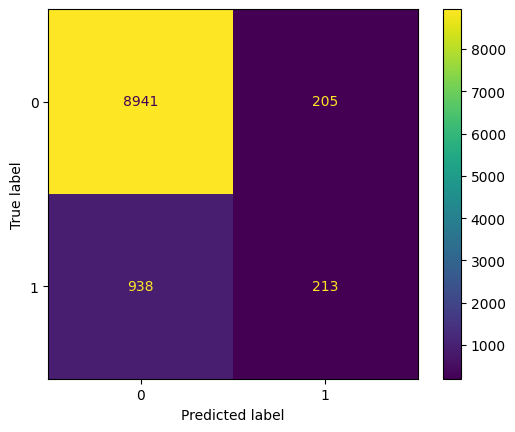

In [324]:
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.savefig('confusion_matrix2.png')